In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
x = dataset.drop(['CustomerID','Gender','Age'], axis=1)
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


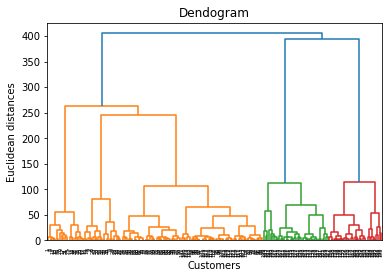

In [10]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method = "ward"))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="ward")
ac.fit(x)

AgglomerativeClustering(n_clusters=5)

In [16]:
hasil_ac = x.copy()
hasil_ac["cluster"] = ac.labels_
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [17]:
hasil_ac = x.copy()
hasil_ac["cluster"] = ac.labels_
hasil_ac.sample(5)

,Annual Income (k$),Spending Score (1-100),cluster
187,101,68,2
16,21,35,4
117,65,59,1
199,137,83,2
122,69,58,1


C:\Users\PRAKTIKAN-05\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


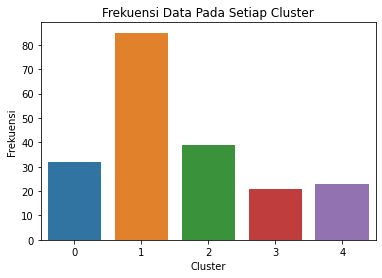

In [19]:
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values

sns.barplot(cluster_x1,cluster_y1)
plt.title("Frekuensi Data Pada Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")
plt.show()

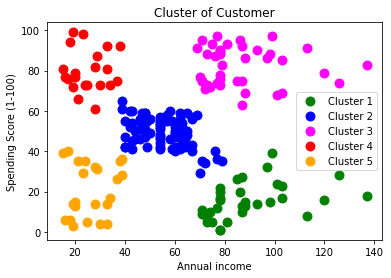

In [21]:
ann_ac0 = hasil_ac[hasil_ac["cluster"] == 0 ].iloc[:,0]
spend_ac0 = hasil_ac[hasil_ac["cluster"] == 0 ].iloc[:, 1]
ann_ac1 = hasil_ac[hasil_ac["cluster"] == 1 ].iloc[:,0]
spend_ac1 = hasil_ac[hasil_ac["cluster"] == 1 ].iloc[:, 1]
ann_ac2 = hasil_ac[hasil_ac["cluster"] == 2 ].iloc[:,0]
spend_ac2 = hasil_ac[hasil_ac["cluster"] == 2 ].iloc[:, 1]
ann_ac3 = hasil_ac[hasil_ac["cluster"] == 3 ].iloc[:,0]
spend_ac3 = hasil_ac[hasil_ac["cluster"] == 3 ].iloc[:, 1]
ann_ac4 = hasil_ac[hasil_ac["cluster"] == 4 ].iloc[:,0]
spend_ac4 = hasil_ac[hasil_ac["cluster"] == 4 ].iloc[:, 1]

plt.scatter(ann_ac0, spend_ac0, s=80, c="green",label ="Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s=80, c="blue",label ="Cluster 2")
plt.scatter(ann_ac2, spend_ac2, s=80, c="magenta",label ="Cluster 3")
plt.scatter(ann_ac3, spend_ac3, s=80, c="red",label ="Cluster 4")
plt.scatter(ann_ac4, spend_ac4, s=80, c="orange",label ="Cluster 5")
plt.title("Cluster of Customer")
plt.xlabel("Annual income")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()